In [1]:
import pandas as pd
import numpy as np
import os
import variablen as var
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from string import ascii_uppercase
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import psutil
import sys
import traceback
from fastai.tabular import *

In [2]:
filename = var.dataset_name_1
csv_file     = var.original_df_1
save_dir = var.prepair_df_dir
column = 'AMT_INCOME_TOTAL'
result_dir = var.result_dir
statistics_dir = var.statistics_dir
result_file = 'result'

In [3]:
def calc_root_mean_squared_error():
    for methode in var.methodes:
        print(methode)
        
        files = os.listdir(result_dir + methode+ '/' )
        print(files)
        for file in files:
            org_column = file[0:-4]
            result = pd.read_csv(result_dir + methode+ '/' +  file , delimiter=";", decimal=",")
            if os.path.exists(statistics_dir + 'statistics.csv'):
                statistics = pd.read_csv(statistics_dir + 'statistics.csv' , delimiter=";", decimal=",")
            else:
                statistics = pd.DataFrame()
            
            original = result.loc[: , org_column]
            result = result.drop(columns=[org_column])
            columns = np.array(['methode','metric','column', 'missing', 'wert'])


            for column in result.columns:
                values = np.array([methode,'root_mean_squared_error', org_column])
                values = np.append(values, [column])
                try:
                    values = np.append(values , [np.sqrt(metrics.mean_squared_error(original, result[column]))])
                except:
                    values = np.append(values , 0)
                
                statistics = pd.DataFrame(np.array([values]), columns=columns).append(statistics, ignore_index=True)
        

            statistics.to_csv(statistics_dir + 'statistics.csv', index=False,sep=';', decimal=',')

In [4]:
def calc_mean_absolute_error():
    for methode in var.methodes:
        files = os.listdir(result_dir + methode+ '/' )
        for file in files:
            org_column = file[0:-4]
            result = pd.read_csv(result_dir + methode+ '/' +  file , delimiter=";", decimal=",")
            if os.path.exists(statistics_dir + 'statistics.csv'):
                statistics = pd.read_csv(statistics_dir + 'statistics.csv' , delimiter=";", decimal=",")
            else:
                statistics = pd.DataFrame()

            original = result.loc[: , org_column]
            result = result.drop(columns=[org_column])
            columns = np.array(['methode','metric','column', 'missing', 'wert'])

        
            for column in result.columns:
                values = np.array([methode,'mean_absolute_error', org_column])
                values = np.append(values, [column])
                try:
                    values = np.append(values , [metrics.mean_absolute_error(original, result[column])])
                except:
                    values = np.append(values , 0)
                
                statistics = pd.DataFrame(np.array([values]), columns=columns).append(statistics, ignore_index=True)

            statistics.to_csv(statistics_dir + 'statistics.csv', index=False,sep=';', decimal=',')

In [5]:
def calc_mean_squared_error():
    for methode in var.methodes:
        files = os.listdir(result_dir + methode+ '/' )
        for file in files:
            org_column = file[0:-4]
            result = pd.read_csv(result_dir + methode+ '/' +  file , delimiter=";", decimal=",")
            if os.path.exists(statistics_dir + 'statistics.csv'):
                statistics = pd.read_csv(statistics_dir + 'statistics.csv' , delimiter=";", decimal=",")

            else:
                statistics = pd.DataFrame()
            
            original = result.loc[: , org_column]
            result = result.drop(columns=[org_column])
            columns = np.array(['methode','metric','column', 'missing', 'wert'])

        

            for column in result.columns:
                values = np.array([methode,'mean_squared_error', org_column])
                values = np.append(values, [column])
                
                try:
                    values = np.append(values , [metrics.mean_squared_error(original, result[column])])
                except:
                    values = np.append(values , 0)
                
                statistics = pd.DataFrame(np.array([values]), columns=columns).append(statistics, ignore_index=True)

            statistics.to_csv(statistics_dir + 'statistics.csv', index=False,sep=';', decimal=',')

In [6]:
def calc_f1_score():
    for methode in var.methodes:
        files = os.listdir(result_dir + methode+ '/' )
        for file in files:
            org_column = file[0:-4]
            result = pd.read_csv(result_dir + methode+ '/' +  file , delimiter=";", decimal=",")
            if os.path.exists(statistics_dir + 'statistics.csv'):
                statistics = pd.read_csv(statistics_dir + 'statistics.csv' , delimiter=";", decimal=",")

            else:
                statistics = pd.DataFrame()
            
            original = result.loc[: , org_column]
            result = result.drop(columns=[org_column])
            columns = np.array(['methode','metric','column', 'missing', 'wert'])

        

            for column in result.columns:
                values = np.array([methode,'f1_score', org_column])
                values = np.append(values, [column])
                try:
                    values = np.append(values , [metrics.f1_score(original, result[column], average='weighted',labels=np.unique(result[column]))])
                except:
                    values = np.append(values , 0)
                
                statistics = pd.DataFrame(np.array([values]), columns=columns).append(statistics, ignore_index=True)

            statistics.to_csv(statistics_dir + 'statistics.csv', index=False,sep=';', decimal=',')
            
            

In [7]:
#try:
calc_root_mean_squared_error()   
calc_mean_squared_error()
calc_mean_absolute_error()   
calc_f1_score()
#except:
 #   print("An exception occurred")

means
['AMT_INCOME_TOTAL.csv']
modus
['AMT_INCOME_TOTAL.csv', 'CODE_GENDER.csv', 'NAME_INCOME_TYPE.csv']
median
['AMT_INCOME_TOTAL.csv']
correlation_1
['AMT_INCOME_TOTAL.csv', 'CODE_GENDER.csv', 'NAME_INCOME_TYPE.csv']
correlation_2
['AMT_INCOME_TOTAL.csv', 'CODE_GENDER.csv', 'NAME_INCOME_TYPE.csv']
correlation_3
['AMT_INCOME_TOTAL.csv', 'CODE_GENDER.csv', 'NAME_INCOME_TYPE.csv']
rondom_forest_classification
['AMT_INCOME_TOTAL.csv', 'CODE_GENDER.csv', 'NAME_INCOME_TYPE.csv']
rondom_forest_regression
['AMT_INCOME_TOTAL.csv']


In [ ]:
confusion = metrics.confusion_matrix(gts,preds, labels=labels)

In [7]:
def transform_int(df,trans_df,do_classify):
    for column in df.columns:
        changed = pd.Series(data=-1, index=range(df[column].size))
        if not do_classify:
            if type(column) != str:
                for i, v in trans_df.iterrows():
                    change = df[column].ne(v[column])
                    changed = changed.where(change,1)
                change = changed.ne(-1)
                df[column] = df[column].where(change, -1)
                continue
                
        for i, v in trans_df.iterrows():
            change = df[column].ne(v[column])
            df[column] = df[column].where(change, i)
            changed = changed.where(change,1)
        change = changed.ne(-1)
        df[column] = df[column].where(change, -1)
        df[column] = df[column].astype('int64')
    return df

In [8]:
def create_trans_table(df):
    result = pd.DataFrame()
    for column in df.columns:
        s = df[[column]].sort_values(by=column, ascending=True).drop_duplicates(ignore_index=True)
        result = pd.concat([result,s], axis=1)
            
        #s = df[[column]]
        #s.to_csv(var.prepair_df_dir + col + '/columns/' + column  ,index=False,sep=';', decimal=',',  float_format='%.2f')
        #s = pd.read_csv(var.prepair_df_dir  + col + '/columns/' + column , delimiter=";", decimal=",")
        #result[column] = s[column]
    return result

In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
csv_file     = var.original_df_1
df = pd.read_csv(csv_file)
trans_df = create_trans_table(df)
types = df.dtypes 
df_temp = transform_int(df.copy(), trans_df,True )
print("Transformation fertig")
corrMatrix = df_temp.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

NameError: name 'Print' is not defined

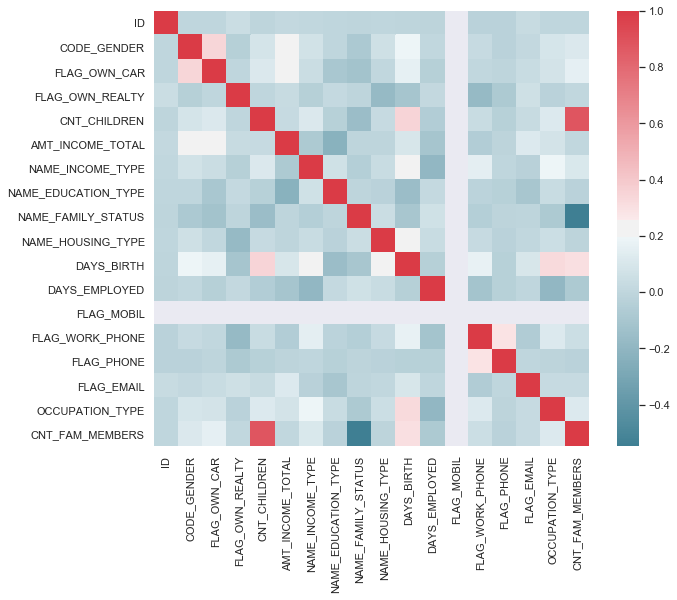

In [13]:
#corrMatrix = df_temp.corr()
f, ax = plt.subplots(figsize=(10, 8))
corr = df_temp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


#sn.heatmap(corrMatrix, annot=True)
#plt.show()
#plt.savefig('application_record_corrMatrix.png')

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_temp.corr(), annot=True)

plt.savefig('application_record_corrMatrix.png')


In [16]:
plt.savefig('foo.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [19]:
print(df_temp['FLAG_MOBIL'].head)

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
438552    0
438553    0
438554    0
438555    0
438556    0
Name: FLAG_MOBIL, Length: 438557, dtype: int64>
